In [1]:
import pandas as pd
path = "bestsellers with categories.csv"

In [2]:
df = pd.read_csv(path)

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет? 
Відповідь: 550

In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [6]:
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски?
Відповідь: Ні

In [7]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
Відповідь: Non Fiction, Fiction

In [8]:
import seaborn as sns

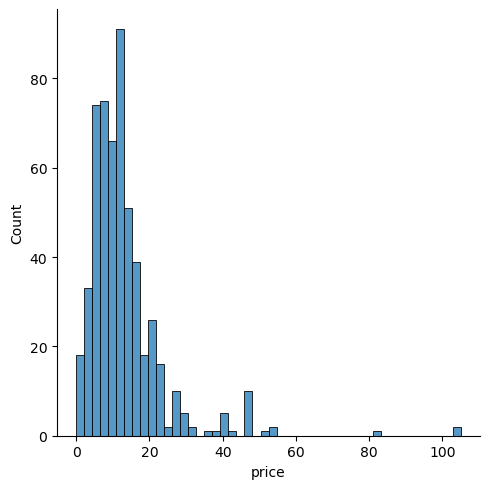

In [9]:
diagram_price=sns.displot(kind='hist', data=df["price"])


In [10]:
df.agg({"price": ["min","max","mean","median"]})

,price
min,0.0
max,105.0
mean,13.1
median,11.0


Максимальна ціна? - 105
Мінімальна ціна? - 0
Середня ціна? - 13.1
Медіанна ціна? - 11.0

In [11]:
max_rating = df["user_rating"].max()
print(max_rating)

4.9


Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [12]:
num_books_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(num_books_max_rating)

52


Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52

In [13]:
df.loc[df["reviews"]== df["reviews"].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Відповідь: Яка книга має найбільше відгуків? Відповідь: "Where the Crawdads Sing"	

In [14]:
books_2015 = df.loc[df["year"] == 2015]
books_2015.loc[books_2015["price"]== books_2015["price"].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
Відповідь: Publication Manual of the American Psychologic


In [15]:
len(df[(df['year'] == 2010) & (df['genre'] == 'Fiction')])

20

Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [16]:
mask_2010 = df['year'].isin([2010])
mask_2011 = df['year'].isin([2011])
mask_rating = df['user_rating'] == 4.9

len(df[(mask_2010 | mask_2011) & mask_rating])


1

Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [17]:
books_2015 = df[(df['year'] == 2015)]
cheap_books_2015 = books_2015[(books_2015['price'] < 8)]
sorted_books_2015 = cheap_books_2015.sort_values(by=['price'])


In [18]:
sorted_books_2015.tail()

,name,author,user_rating,reviews,price,year,genre
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Відповідь: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid)


In [19]:
min_max_prices = df.groupby('genre')[['price']].agg(['min', 'max'])
print(min_max_prices)

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


Відповідь: Максимальна ціна для жанру Fiction: Відповідь: 82

Відповідь: Мінімальна ціна для жанру Fiction: Відповідь: 0

Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь: 105

Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь: 0

In [20]:
author_books = df.groupby('author')[['name']].count()
author_books = author_books.rename(columns={'name': 'Books_Count'})
author_books = author_books.sort_values('Books_Count', ascending=False)
author_books.head(10)

,Books_Count
author,
Jeff Kinney,12
Gary Chapman,11
Suzanne Collins,11
Rick Riordan,11
American Psychological Association,10
Gallup,9
Dr. Seuss,9
Rob Elliott,8
Eric Carle,7


In [21]:
author_books.shape

(248, 1)

Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248


In [22]:
author_books.index[0]

'Jeff Kinney'

Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney

In [23]:
author_books.max()

Books_Count    12
dtype: int64

Відповідь: Скільки книг цього автора? Відповідь: 12

In [24]:
author_ratings = df[['name', 'author', 'user_rating']].groupby('author').agg('mean', numeric_only=True)
author_ratings.head()

,user_rating
author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8
Admiral William H. McRaven,4.7


In [69]:
author_ratings_sorted = author_ratings.sort_values('user_rating')
author_ratings_sorted.iloc[0]

user_rating    3.9
Name: Donna Tartt, dtype: float64

Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

In [26]:
authors = author_books.rename(columns={'name': 'book_count'})
author_stats = pd.merge(authors, author_ratings_sorted, on='author')
author_stats.head()

,Books_Count,user_rating
author,,
Jeff Kinney,12,4.800000
Gary Chapman,11,4.736364
Suzanne Collins,11,4.663636
Rick Riordan,11,4.772727
American Psychological Association,10,4.500000


In [27]:
sorted_df = author_stats.sort_values(["Books_Count", "user_rating"], ascending=True)
sorted_df.iloc[0]

Books_Count    1.0
user_rating    4.0
Name: Muriel Barbery, dtype: float64

Відповідь: Який автор перший у списку? Muriel Barbery

In [39]:
import matplotlib.pyplot as plt

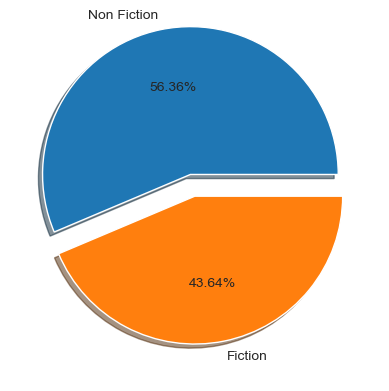

In [66]:
genre = df["genre"].value_counts()
labels = genre.index
explode = [0.15, 0]
plt.pie(genre, labels = labels, autopct="%.2f%%", explode=explode, shadow=True)
plt.show()

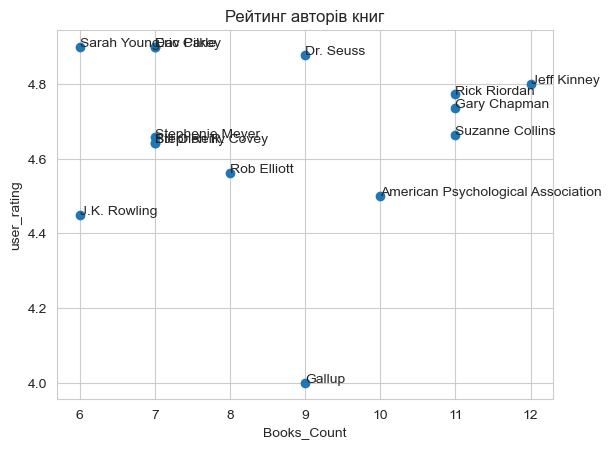

In [107]:
data = author_stats.iloc[0:15].sort_values("user_rating", ascending=False)

fig, ax = plt.subplots()
ax.scatter(data['Books_Count'], data['user_rating'])


for i, txt in enumerate(data.index):
    ax.annotate(txt, (data['Books_Count'][i], data['user_rating'][i]))



ax.set_xlabel('Books_Count')
ax.set_ylabel('user_rating')
ax.set_title('Рейтинг авторів книг')


plt.show()